# DBSCAN Clustering

## Imports

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random_s = 101

## Load Data

In [202]:
# From Google Drive

import gdown # for google drive

# Set the Google Drive file ID (replace with your actual file ID)

# https://drive.google.com/file/d/1B99f3nG0j1EWCYQ8E2nx6hWxBFTt6YFE/view?usp=sharing

file_id = '1B99f3nG0j1EWCYQ8E2nx6hWxBFTt6YFE'  # Replace with your file ID
destination = 'creditcard_reduced.csv'  # Specify the destination filename

# Construct the direct download URL

gdrive_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file using gdown
gdown.download(gdrive_url, destination, quiet=False)

# Load the dataset using pandas

df = pd.read_csv(destination)
df.tail(3)

Downloading...
From: https://drive.google.com/uc?id=1B99f3nG0j1EWCYQ8E2nx6hWxBFTt6YFE
To: /content/creditcard_reduced.csv
100%|██████████| 3.77M/3.77M [00:00<00:00, 76.6MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10489,10490,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
10490,10491,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
10491,10492,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


## Select Features to Cluster

In [203]:
# Use needed data only by dropping

reduced_df = df.drop(['Time', 'Amount', 'Class'], axis = 1)
reduced_df.tail(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
10489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
10490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700
10491,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309


# Principal Component Analysis (PCA)

In [204]:
# Calculate the PCAs

from sklearn.decomposition import PCA

# Apply PCA

pca = PCA()
pca.fit(reduced_df)

# Extract the explained variance ration and components

explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Display the explained variance and components

explained_variance, components

(array([0.45072991, 0.07700718, 0.06087379, 0.05039353, 0.04048188,
        0.03699857, 0.03334089, 0.03142556, 0.02811857, 0.02401777,
        0.02056914, 0.01694128, 0.01662906, 0.01615113, 0.01561912,
        0.01319631, 0.0116688 , 0.01011818, 0.00913865, 0.0060908 ,
        0.00551761, 0.0050851 , 0.00482564, 0.00465807, 0.0038005 ,
        0.00332042, 0.00219774, 0.00108479]),
 array([[ 3.03096696e-01, -2.04769928e-01,  4.21055776e-01,
         -1.94319162e-01,  2.20741878e-01,  6.40392300e-02,
          3.44067734e-01, -3.89097146e-02,  1.60034909e-01,
          2.83443767e-01, -1.43446289e-01,  2.50874552e-01,
          2.49708497e-02,  3.00305381e-01,  2.78566421e-03,
          2.10951854e-01,  3.65919329e-01,  1.31203406e-01,
         -4.03437968e-02, -2.14196883e-02, -1.87675088e-02,
         -8.53282842e-03, -3.38824399e-03,  2.00519995e-03,
          1.89171209e-03,  2.23644094e-03,  6.29315368e-04,
          4.94203182e-04],
        [ 4.07554912e-01, -2.20307847e-01,  3.6

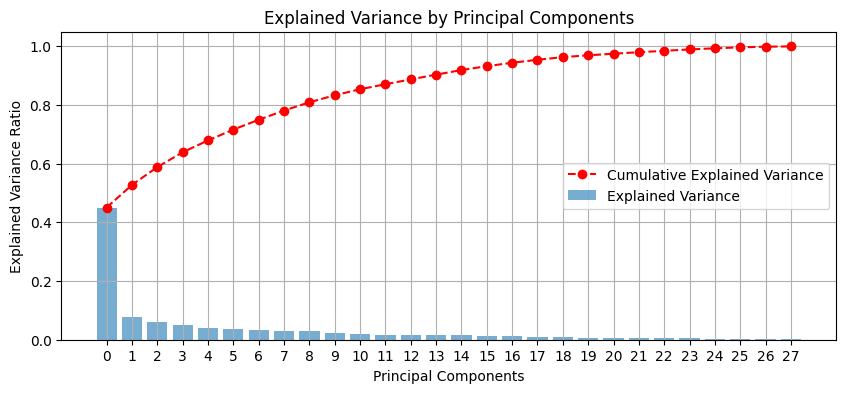

In [205]:
# Plot the explained variance of each principal component

plt.figure(figsize=(10, 4))

# Plot the cumulative explained variance

plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', label = 'Cumulative Explained Variance', color = 'red')

# Plot the individual explained variance for each component

plt.bar(range(0, len(explained_variance)), explained_variance, alpha = 0.6, label='Explained Variance')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(0, len(explained_variance)))
plt.grid(True)
plt.legend(loc = 'center right')
plt.show()

In [206]:
# Project the original data onto the first two principal components

pca_2d = PCA(n_components = 2)
data_pca_2d = pca_2d.fit_transform(reduced_df)

# Reconstruct into a DataFrame

data_pca_2d_df = pd.DataFrame(data_pca_2d, columns = ['PC0', 'PC1'])
data_pca_2d_df

,PC0,PC1
0,0.940104,0.019498
1,0.886999,0.729326
2,1.017147,0.206814
3,1.068612,0.116915
4,0.888722,-0.336308
...,...,...
10487,-11.328612,3.610425
10488,-7.706645,3.358532
10489,-7.425235,2.487468
10490,-11.886696,3.190719


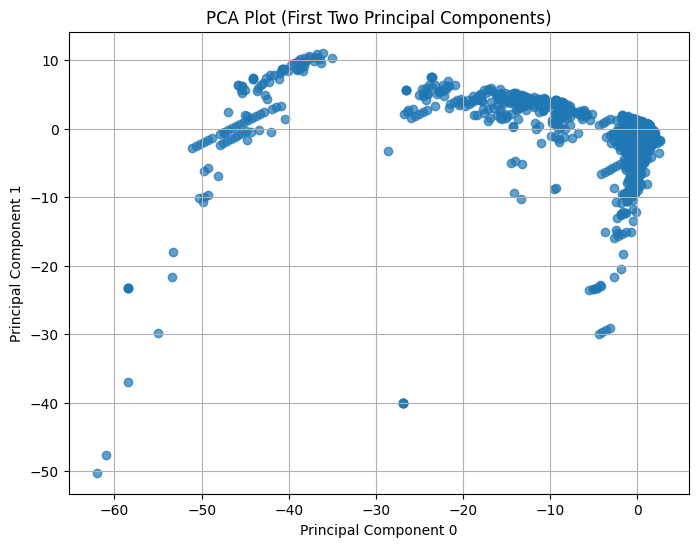

In [207]:
# Create a scatter plot of the first two principal components

plt.figure(figsize=(8, 6))

plt.scatter(data_pca_2d_df['PC0'], data_pca_2d_df['PC1'], alpha = 0.7)

plt.title('PCA Plot (First Two Principal Components)')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.grid(True)
plt.show()

## DBSCAN

## Final DBSCAN Model

In [208]:
from sklearn.cluster import DBSCAN

# Define DBSCAN model with eps = n and min_samples = n

final_model = DBSCAN(eps = 0.50, min_samples = 4)

# Fit the model to the scaled dataset

clusters = final_model.fit_predict(data_pca_2d_df)

# Add the cluster labels to the scaled DataFrame

data_pca_2d_df['Cluster'] = clusters
data_pca_2d_df.head(3)

,PC0,PC1,Cluster
0,0.940104,0.019498,0
1,0.886999,0.729326,0
2,1.017147,0.206814,0


## Visualized the Clusters

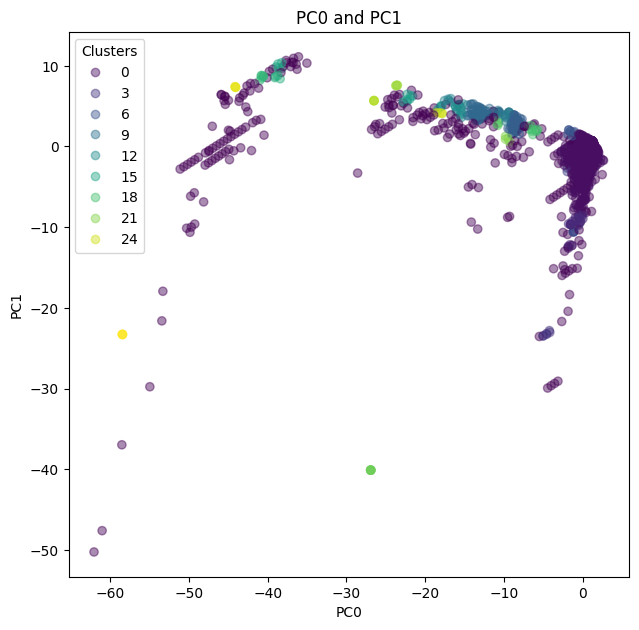

In [209]:
# Plotting the clusters

# Define pairs of features to visualize

feature_pairs = [

    ('PC0', 'PC1')

]

# Visualize the clusters in pairwise plots for the scaled data with individual legends for each plot

plt.figure(figsize=(18, 12))

for i, (feature_x, feature_y) in enumerate(feature_pairs, 1):

    plt.subplot(2, 3, i)

    scatter = plt.scatter(data_pca_2d_df[feature_x], data_pca_2d_df[feature_y],
                          c = data_pca_2d_df['Cluster'], marker = 'o', alpha = 0.45)

    plt.title(f'{feature_x} and {feature_y}')

    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

    # Add a legend to each subplot
    plt.legend(*scatter.legend_elements(), title = "Clusters") # place legend to all subplots

plt.tight_layout()
plt.show()

In [210]:
# DBSCAN has flagged these as noise points (-1), indicating that their behaviors do not align with the majority of customers in the dataset.
# Outlier Counting

print(len(data_pca_2d_df[data_pca_2d_df['Cluster'] == -1]))
data_pca_2d_df[data_pca_2d_df['Cluster'] == -1]

235


,PC0,PC1,Cluster
455,0.809979,-6.246121,-1
460,-6.288052,2.617396,-1
825,-3.074718,-2.105400,-1
1558,0.321546,-7.989353,-1
2232,-1.689829,-18.356793,-1
...,...,...,...
10481,-3.712819,-15.148802,-1
10486,-8.907577,0.150099,-1
10487,-11.328612,3.610425,-1
10489,-7.425235,2.487468,-1


In [211]:
# Data detected as True anomalous (189 correct detection)

print(len(data_pca_2d_df[data_pca_2d_df['Cluster'] == -1].loc[10000:,:]))
data_pca_2d_df[data_pca_2d_df['Cluster'] == -1].loc[10000:,:]

189


,PC0,PC1,Cluster
10014,-11.369706,4.352827,-1
10025,-36.080180,11.109933,-1
10027,-35.017871,10.323492,-1
10028,-36.947960,10.459011,-1
10029,-11.343578,4.328585,-1
...,...,...,...
10481,-3.712819,-15.148802,-1
10486,-8.907577,0.150099,-1
10487,-11.328612,3.610425,-1
10489,-7.425235,2.487468,-1


In [213]:
# Comparison with known data, DBSCAN can detect anamalous data
# 189 (correctly clustered) out of 492

print(len(df[df['Class'] == 1]))
df[df['Class'] == 1]

492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10000,10001,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
10001,10002,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
10002,10003,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
10003,10004,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
10004,10005,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,10488,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
10488,10489,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
10489,10490,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
10490,10491,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
